# Results

## Linear Regression 
CV Score: 0.165 
Test Score: 0.16454088984181903

## Polynomial Regression
CV Score: 0.165 
Test Score: 0.1645408413852154

## SGD Regression
CV Score: 0.1634937630453061
Test Score: 0.16291008822896602

## Ridge Regression
CV Score: 0.16336144479033818
Test Score: 0.16454088913302967

## Lasso Regression
CV Score: 0.16305691570212932
Test Score: 0.16446225897094277

## Dtree Regression
CV Score:
Test Score:

## SVR 
CV Score:
Test Score:

In [164]:
import numpy as np
import pandas as pd

In [165]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [166]:
train_df = pd.read_csv('/Users/tapas/Downloads/Oil/predict-citations-for-us-patents/train.csv')
X_train = train_df.drop(['fwd'],axis=1)
y_train = train_df['fwd']


In [167]:
X_test = pd.read_csv('/Users/tapas/Downloads/Oil/predict-citations-for-us-patents/test.csv')


In [168]:
X_train.head()

,Id,lag_d,noc,gy,ay,noi,UMC,firm,MSA,tbm,tbru,PAG,npr,fpr,FT,FS
0,1,669,21,1998,1996,2,707,280070,261,13,0.60357,5366339.923,6,0,2,225.0
1,2,301,18,1990,1989,2,348,789656,538,1,0.00000,4719510.000,1,0,2,310.0
2,3,1016,23,1997,1994,5,725,499570,13,6,0.61112,4893738.000,0,0,2,3.0
3,4,929,32,1997,1994,3,315,654319,553,4,0.37500,4817136.250,0,5,3,64.0
4,5,1233,20,1999,1996,2,710,551495,261,2,0.00000,5135114.000,0,0,2,14.0


In [169]:
#data['log_fwd'] = data['fwd'].apply(lambda x: np.log(x+0.001))
#cap_right = ['lag_d','noc','tbm','tbru']
#data['lag_d'] = data['lag_d'].apply(lambda x: np.log(x+0.001))
#data['noc'] = data['noc'].apply(lambda x: np.log(x+0.001))
#data['tbm'] = data['tbm'].apply(lambda x: np.log(x+0.001))
#data['tbru'] = data['tbru'].apply(lambda x: np.log(x+0.001))

In [170]:
from sklearn.model_selection import train_test_split
'''
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape
'''



"\nX_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),\n                                                    data['fwd'],\n                                                    test_size=0.2,\n                                                    random_state=0)\nX_train.shape, X_test.shape\n"

In [171]:
#categorical=['ay','gy','firm','UMC','MSA','FT']
categorical=['firm','UMC','MSA','FT']

In [172]:
#npr 20/25
#Cent 20
#IT 25
'''
import matplotlib.pyplot as plt

var = 'npr'

disc = EqualFrequencyDiscretiser(q=25, variables =var)
disc.fit(X_train)
train_t = disc.transform(X_train)
pd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()
print(disc.binner_dict_)
plt.ylabel('mean of fwd')
'''


"\nimport matplotlib.pyplot as plt\n\nvar = 'npr'\n\ndisc = EqualFrequencyDiscretiser(q=25, variables =var)\ndisc.fit(X_train)\ntrain_t = disc.transform(X_train)\npd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()\nprint(disc.binner_dict_)\nplt.ylabel('mean of fwd')\n"

In [173]:
#fpr
'''
import matplotlib.pyplot as plt 
var ='fpr'

disc = EqualWidthDiscretiser(bins=15, variables =var)
disc.fit(X_train)
train_t = disc.transform(X_train)
pd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()
plt.ylabel('mean of fwd')
'''


"\nimport matplotlib.pyplot as plt \nvar ='fpr'\n\ndisc = EqualWidthDiscretiser(bins=15, variables =var)\ndisc.fit(X_train)\ntrain_t = disc.transform(X_train)\npd.concat([train_t, y_train], axis=1).groupby(var)['fwd'].mean().plot()\nplt.ylabel('mean of fwd')\n"

In [174]:
import seaborn as sns
import scipy.stats as stats
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

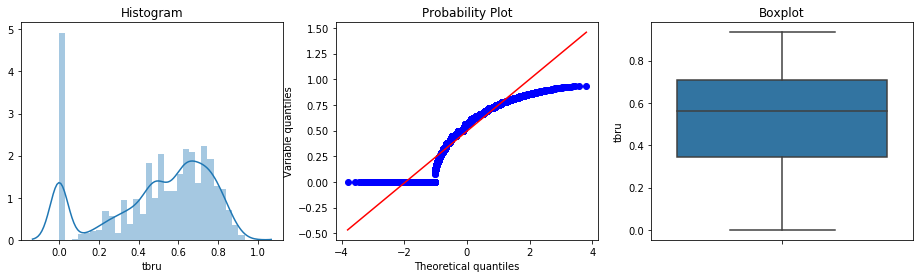

In [175]:
from feature_engine.outlier_removers import Winsorizer
cap_right = ['lag_d','noc','tbm']
#'npr','fpr','Cent','RT','3rd_PT']
cap_left = ['tbru']
#ouliers = ['npr','fpr','Cent','IT','RT','DT']

#gaussian,skewed,quantiles
#lag_d - gaussian right

winsorizer = Winsorizer(distribution='gaussian', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='left', # cap left, right or both tails 
                          fold=3,
                          variables=cap_left)

winsorizer.fit(X_train)
winsorizer.left_tail_caps_
winsorizer.right_tail_caps_
X_train_t = winsorizer.transform(X_train)
X_test_t = winsorizer.transform(X_test)
for variable in cap_left:
    diagnostic_plots(X_train_t, variable)

In [176]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')
discrete = ['npr','fpr']
continuous=list(set(list(X_train.columns))-set(categorical) - set(discrete))


In [177]:
continuous

['noc', 'lag_d', 'PAG', 'tbm', 'FS', 'ay', 'tbru', 'Id', 'noi', 'gy']

In [178]:
discrete

['npr', 'fpr']

In [179]:
categorical

['firm', 'UMC', 'MSA', 'FT']

In [180]:
cap_left

['tbru']

In [181]:
cap_right

['lag_d', 'noc', 'tbm']

In [182]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from feature_engine.outlier_removers import Winsorizer
from sklearn.preprocessing import FunctionTransformer
from feature_engine.variable_transformers import LogTransformer
from feature_engine.missing_data_imputers import AddNaNBinaryImputer
from feature_engine.missing_data_imputers import EndTailImputer
from sklearn.impute import SimpleImputer
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.discretisers import EqualWidthDiscretiser
from sklearn.base import BaseEstimator, TransformerMixin



In [183]:
class log_add_const(BaseEstimator,TransformerMixin):
    def __init__(self,feature_names):
        self.feature_names = feature_names
        
    def fit(self,X,y = None):
        return self
    
    def transform(self,X,y = None):
        for var in self.feature_names:
            X[var] = np.log(X[var]+0.001)
        return X


In [184]:
'''
patent_preprocess = Pipeline([
    
    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),
    ('capping_right',Winsorizer(distribution='gaussian',tail='right',fold=3,variables=cap_right)),
    ('capping_left',Winsorizer(distribution='gaussian',tail='left',fold=3,variables=cap_left)),
    ('capping_both',Winsorizer(distribution='gaussian',tail='both',fold=3,variables=continuous)),
    ('log_transform',LogTransformer(variables = cap_right)),
    ('equal_freq_disc1',EqualFrequencyDiscretiser(q=20, variables =['npr','Cent'])),
    ('equal_freq_disc2',EqualFrequencyDiscretiser(q=25, variables =['IT'])),
    ('equal_dist_disc',EqualWidthDiscretiser(bins=15, variables =['fpr'])),
    
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical )),
    ('One_hot', ce.OneHotCategoricalEncoder(variables=categorical)),
    ('missing_val_imputer',SimpleImputer(strategy='most_frequent')),
    #('categorical_enc', ce.OrdinalCategoricalEncoder(encoding_method='ordered', variables=categorical)),


   
    # categorical encoding 
     
])
'''


"\npatent_preprocess = Pipeline([\n    \n    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),\n    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),\n    ('capping_right',Winsorizer(distribution='gaussian',tail='right',fold=3,variables=cap_right)),\n    ('capping_left',Winsorizer(distribution='gaussian',tail='left',fold=3,variables=cap_left)),\n    ('capping_both',Winsorizer(distribution='gaussian',tail='both',fold=3,variables=continuous)),\n    ('log_transform',LogTransformer(variables = cap_right)),\n    ('equal_freq_disc1',EqualFrequencyDiscretiser(q=20, variables =['npr','Cent'])),\n    ('equal_freq_disc2',EqualFrequencyDiscretiser(q=25, variables =['IT'])),\n    ('equal_dist_disc',EqualWidthDiscretiser(bins=15, variables =['fpr'])),\n    \n    ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical )),\n    ('One_hot', ce.OneHotCategoricalEncoder(variables=categorical)),\n    ('missi

In [185]:
patent_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',variables=['FS'])),
    ('equal_freq_disc1',EqualFrequencyDiscretiser(q=20, variables =['npr'])),
    ('equal_dist_disc',EqualWidthDiscretiser(bins=15, variables =['fpr'])),
    #('capping_right',Winsorizer(distribution='gaussian',tail='right',fold=3,variables=cap_right)),
    #('capping_left',Winsorizer(distribution='gaussian',tail='left',fold=3,variables=cap_left)),
    ('log_transform',log_add_const(cap_right+cap_left)),
    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(tol=0.01,n_categories=6, variables=categorical )),
    #('categorical_enc', ce.OrdinalCategoricalEncoder(encoding_method='ordered', variables=categorical)),
    ('One_hot', ce.OneHotCategoricalEncoder(variables = categorical)),
     
])

In [186]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('equal_freq_disc1',
                 EqualFrequencyDiscretiser(q=20, return_object=False,
                                           variables=['npr'])),
                ('equal_dist_disc',
                 EqualWidthDiscretiser(bins=15, return_object=False,
                                       variables=['fpr'])),
                ('log_transform',
                 log_add_const(feature_names=['lag_d', 'noc', 'tbm', 'tbru'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variables=['firm', 'UMC', 'MSA',
                                                        'FT'])),
                ('One_hot',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                     

In [187]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures


In [189]:
lr= LinearRegression()

In [190]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.12925021 0.15733037 0.15439412 0.10951434 0.15906031]
Average cross-validation score: 0.14


In [192]:
lr.score(X_train,y_train)

0.16095185031185344

In [ ]:
def add_const(X):
    X['noc'] = X['noc'].apply(lambda x: np.log(x+0.001))
    return X

In [ ]:
model_gs = Pipeline([("Poly",PolynomialFeatures()),("regressor", LinearRegression())])


In [ ]:

model_parm_gd = [
    
    #{'regressor': [LinearRegression()]},
    
    {   'Poly__degree':range(1,3),
     'regressor': [LinearRegression()]},
]

In [ ]:
grid_search_house_pipe = GridSearchCV(model_gs, model_parm_gd,cv=5)
grid_search_house_pipe.fit(X_train,y_train)

X_train_preds = grid_search_house_pipe.predict(X_train)
X_test_preds = grid_search_house_pipe.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

print("Best Mean Cross-validation score: {:.2f}".format(grid_search_house_pipe.best_score_))
print(grid_search_house_pipe.best_params_)

'''
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
'''

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))




In [ ]:
len(X_test_preds)


In [ ]:
len(X_test)

In [ ]:
X_test['preds'] = X_test_preds

In [ ]:
X_test.head()

In [ ]:
df_out = pd.merge(X_test,pd.DataFrame(X_test_preds),how = 'left',left_index = True, right_index = True)

In [ ]:
df_out.head()

In [ ]:
X_test['preds'] = X_test_preds
pd.DataFrame({'Id': X_test['Id'], 'fwd': X_test['preds']}).to_csv('solution_TXM190014.csv', index =False) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

reg_sgd_pipe = Pipeline([
    ('scaler',MinMaxScaler()),
    ('sgd_reg',SGDRegressor(max_iter=100,verbose=11,early_stopping=True,validation_fraction=0.2))
])

param_sgd = {'sgd_reg__learning_rate':['invscaling','adaptive'],
            'sgd_reg__penalty':['l2', 'l1', 'elasticnet'],
             'sgd_reg__alpha':[0.0001,0.0005,0.001],
             'sgd_reg__l1_ratio':[0.15,0.20,0.40,0.50,0.60],
             'sgd_reg__tol':[1e-4,1e-3]
            }
grid_sgd = GridSearchCV(reg_sgd_pipe,param_sgd,cv=5,n_jobs=-1,return_train_score=True)

grid_sgd.fit(X_train,y_train)

X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)



scores = cross_val_score(grid_sgd, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

print("CV Score",grid_sgd.score(X_train, y_train))

print("Mean CV Score :",grid_sgd.best_score_)

print('train rmse',sqrt(mean_squared_error(y_train,X_train_preds)))
print("train r2: ", r2_score(y_train,X_train_preds))

print('test rmse',sqrt(mean_squared_error(y_test,X_test_preds)))
print("test r2: ", r2_score(y_test,X_test_preds))

print('best partams', grid_sgd.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge_pipe = Pipeline([
        ('scaler',StandardScaler()),
        ('ridge_reg',Ridge())])

ridge_params = {'ridge_reg__alpha':[0.001, 0.01,0.05, 0.1, 0.25,0.5,1, 10,100,150]}

grid_ridge = GridSearchCV(ridge_pipe,ridge_params,cv=5,return_train_score = True)

grid_ridge.fit(X_train,y_train)

X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)


print('best params ',grid_ridge.best_params_)
scores = cross_val_score(grid_ridge, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print('Cv score ',grid_ridge.best_score_)

print('train rmse',sqrt(mean_squared_error(y_train,X_train_preds)))
print("train r2: ", r2_score(y_train,X_train_preds))

print('test rmse',sqrt(mean_squared_error(y_test,X_test_preds)))
print("test r2: ", r2_score(y_test,X_test_preds))
print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))


In [196]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(selection='random',max_iter=10000)

param_lasso = {'alpha':[0.001, 0.01,0.05, 0.1, 0.25,0.5,1, 10,100,150]}

grid_lasso = GridSearchCV(lasso,param_lasso,cv=10, return_train_score = True)

grid_lasso.fit(X_train,y_train)

X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)

print('CV Score',grid_lasso.best_score_)
print('Train RMSE',sqrt(mean_squared_error(y_train,X_train_preds)))


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 88 is different from 89)

In [195]:
X_test['preds'] = X_test_preds
pd.DataFrame({'Id': X_test['Id'], 'fwd': X_test['preds']}).to_csv('solution_TXM190014.csv', index =False) 

In [ ]:
#Took too long to run
'''
from sklearn.neighbors import KNeighborsRegressor

knn_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('knn_reg',KNeighborsRegressor(algorithm='auto'))
])

knn_params = {'knn_reg__weights':['uniform','distance'],
             'knn_reg__leaf_size': [5,10,20,30],
             'knn_reg__n_neighbors': [5,10,15],
             'knn_reg__p':[1,2,3]}

knn_reg_grid = GridSearchCV(knn_pipe,knn_params,cv=5,return_train_score = True)

knn_reg_grid.fit(X_train,y_train)

X_train_preds = knn_reg_grid.predict(X_train)
X_test_preds = knn_reg_grid.predict(X_test)

print("CV score ",knn_reg_grid.best_score_)
print("Best Params ",knn_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))
'''



In [ ]:
from sklearn.tree import DecisionTreeRegressor

dreg_pipe = Pipeline([
    ('dtree_reg',DecisionTreeRegressor())
])

dreg_params = {
    'dtree_reg__criterion':['mse','friedman_mse','mae'],
    'dtree_reg__splitter':['random','best'],
    'dtree_reg__max_depth':[20,30],
    'dtree_reg__min_samples_split':[4,8,12,16],
    'dtree_reg__min_samples_leaf' :[2,4,8],
    'dtree_reg__max_features':['auto','sqrt']
}

dtree_reg_grid = GridSearchCV(dreg_pipe,dreg_params,cv=5,return_train_score = True)

dtree_reg_grid.fit(X_train,y_train)

X_train_preds = dtree_reg_grid.predict(X_train)
X_test_preds = dtree_reg_grid.predict(X_test)

print("CV score ",dtree_reg_grid.best_score_)
print("Best Params ",dtree_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))

In [ ]:
from sklearn.svm import SVR

svm_reg_pipe = Pipeline([
    ('svm_reg',SVR())
])

svm_reg_params = {
    'svm_reg__kernel':['linear','poly','rbf','sigmoid'],
    'svm_reg__degree':[3,4,5],
    'svm_reg__gamma': ['auto','scale'],
    'svm_reg__coef0':[2.0,4.0,10.0,15.0]
}

svm_reg_grid = GridSearchCV(svm_reg_pipe,svm_reg_params,cv=5,return_train_score = True)

svm_reg_grid.fit(X_train,y_train)

X_train_preds = svm_reg_grid.predict(X_train)
X_test_preds = svm_reg_grid.predict(X_test)

print("CV score ",svm_reg_grid.best_score_)
print("Best Params ",svm_reg_grid.best_params_)

print("train RMSE",sqrt(mean_squared_error(y_train,X_train_preds)))
print("train R2/score",r2_score(y_train,X_train_preds))

print("test RMSE",sqrt(mean_squared_error(y_test,X_test_preds)))
print("test R2/score",r2_score(y_test,X_test_preds))


In [ ]:
#took too long to run

'''
model_parm_gd = [
    
    #{'regressor': [LinearRegression()]},
    
    {   'Poly__degree':range(1,2),
       'regressor': [LinearRegression()]},
    {   'Poly__degree':range(1,3),
        'regressor':[SGDRegressor(max_iter=1000,verbose=11,early_stopping=True,validation_fraction=0.2)],
        'regressor__learning_rate':['invscaling','adaptive'],
        'regressor__penalty':['l2', 'l1', 'elasticnet'],
        'regressor__alpha':[0.0001,0.0005,0.001],
        'regressor__l1_ratio':[0.15,0.20,0.40,0.50,0.60],
        'regressor__tol':[1e-4,1e-3]
    }
 
]

    { 'regressor': [Ridge()],
     'Poly__degree':range(1,3),
     'regressor__alpha':[10, 50,100],
    'regressor__solver':['auto']},
    
    { 'Poly__degree':range(1,3),
     'regressor': [Lasso()],
      'regressor__alpha':[1, 10,50]},


grid_search_house_pipe = GridSearchCV(model_gs, model_parm_gd,cv=5)
grid_search_house_pipe.fit(X_train,y_train)


# let's get the predictions
X_train_preds = grid_search_house_pipe.predict(X_train)
X_test_preds = grid_search_house_pipe.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

print("Best Mean Cross-validation score: {:.2f}".format(grid_search_house_pipe.best_score_))
print(grid_search_house_pipe.best_params_)



print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
'''